#  Customer Segmentation for a Wholesale Distributor

#### To segment customers based on their annual spending across various product categories, identify distinct groups, and analyze their purchasing behavior to derive business insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
print(df.shape)

df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
df.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338


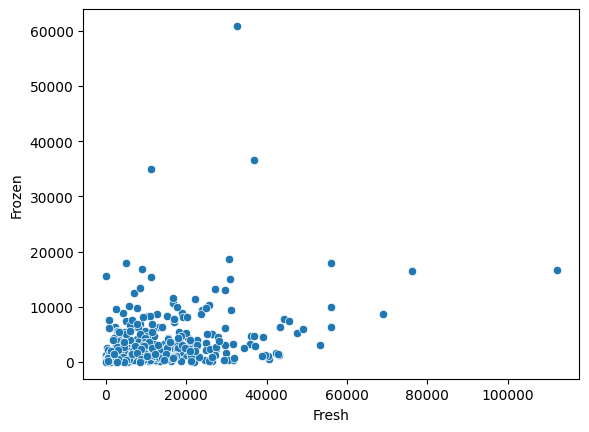

In [8]:
sns.scatterplot(df,x='Fresh',y='Frozen')
plt.show()

In [9]:
print(len(df.columns))
print(len(df.select_dtypes(['int64','float64']).columns))

8
8


In [10]:
features = df.columns
features

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame()
scaler  = StandardScaler()

df_scaled[features] = scaler.fit_transform(df[features])
df_scaled.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293


In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [13]:
sse = []
k_rng = range(1,10)

for k in k_rng:
   km = KMeans(n_clusters=k,n_init='auto')
   km.fit(df_scaled[features])
   
   sse.append(km.inertia_)
print(sse)   


c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[3520.0, 2600.3756482224426, 2294.4979282860463, 1889.505145665437, 1702.4938296297598, 1325.5062087858946, 1189.8846881034983, 1066.6605087783375, 1020.9937505679981]


c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
print(sse)

[3520.0, 2600.3756482224426, 2294.4979282860463, 1889.505145665437, 1702.4938296297598, 1325.5062087858946, 1189.8846881034983, 1066.6605087783375, 1020.9937505679981]


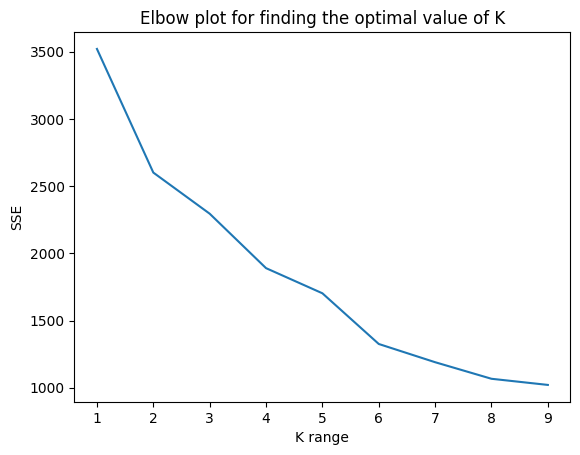

In [15]:
plt.plot(k_rng,sse)
plt.title("Elbow plot for finding the optimal value of K")
plt.xlabel("K range")
plt.ylabel("SSE")
plt.show()


In [16]:
# Optimal value of k should 3 according to the plot

km = KMeans(n_clusters=3,n_init='auto')
km.fit(df_scaled[features])

print(f"Centroids = {km.cluster_centers_}")
print(f"SSE = {km.inertia_}")

Centroids = [[-0.59729932 -0.02772551  2.45346744  0.55609986  0.10556603  2.33792995
  -0.32911877  1.80641072]
 [-0.6522375  -0.05353359 -0.06630255 -0.37499167 -0.4552825  -0.03244419
  -0.44599691 -0.1672703 ]
 [ 1.44865163  0.11529873 -0.27793188  0.68075266  0.92284091 -0.3283498
   0.97716811  0.04011403]]
SSE = 2257.993260943644


c:\Users\adinr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [17]:
df_scaled['Cluster'] = km.labels_

In [18]:
df_scaled['Cluster'].value_counts()

Cluster
1    281
2    136
0     23
Name: count, dtype: int64

In [19]:
df_scaled.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2


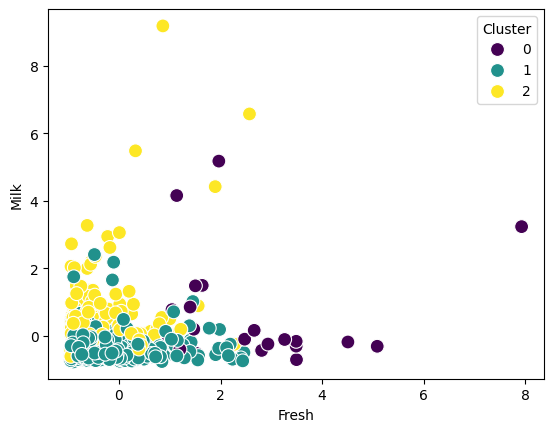

In [20]:
sns.scatterplot(df_scaled,x='Fresh',y='Milk',hue='Cluster',palette='viridis',s=100)
plt.show()

### Agglomerative Clustering

In [21]:
ag = AgglomerativeClustering(n_clusters=3)
ag.fit(df_scaled[features])


AgglomerativeClustering(n_clusters=3)

In [22]:
df_scaled['Cluster_ag'] = ag.labels_

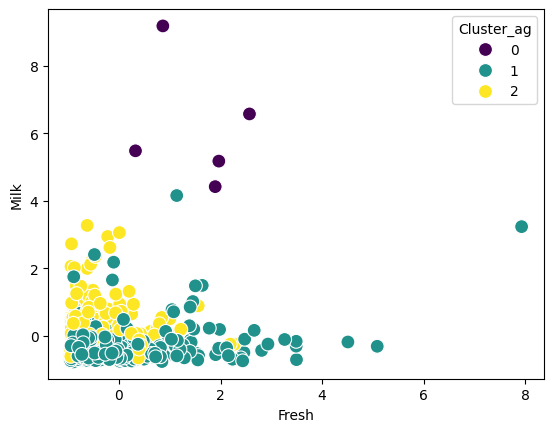

In [23]:
sns.scatterplot(data=df_scaled,x='Fresh',y='Milk',hue='Cluster_ag',palette='viridis',s=100)
plt.show()

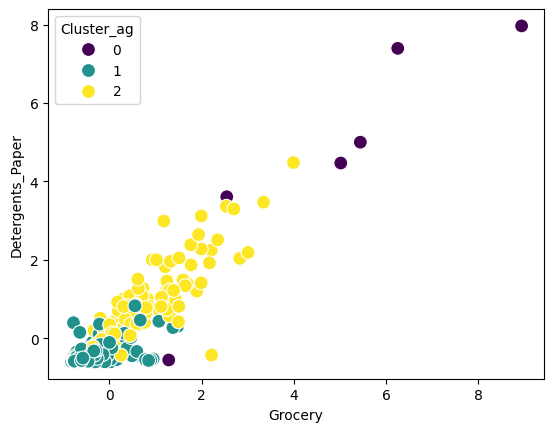

In [24]:
sns.scatterplot(data=df_scaled,x='Grocery',y='Detergents_Paper',hue='Cluster_ag',palette='viridis',s=100)
plt.show()

### DB Scan

In [25]:
db = DBSCAN(eps=0.5,min_samples=5)
db.fit(df_scaled[features])

DBSCAN()

In [26]:
df_scaled['Cluster_db'] = db.labels_

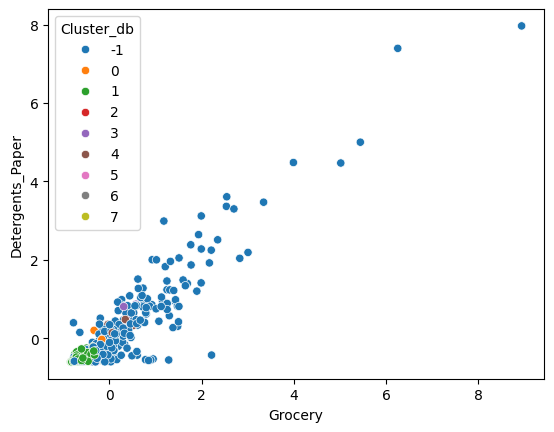

In [27]:
sns.scatterplot(data=df_scaled,x='Grocery',y='Detergents_Paper',hue='Cluster_db',palette='tab10')
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [29]:
# kmeans = KMeans(n_clusters=3, random_state=42)
ag_labels = ag.fit_predict(df_scaled[features])


In [30]:
# Silhouette Score
silhouette_avg = silhouette_score(df_scaled[features],ag.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Davies-Bouldin Index
db_score = davies_bouldin_score(df_scaled[features], ag.labels_)
print(f"Davies-Bouldin Index: {db_score:.2f}")

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_scaled[features], ag.labels_)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")


Silhouette Score: 0.36
Davies-Bouldin Index: 1.16
Calinski-Harabasz Index: 126.25
